<a href="https://colab.research.google.com/github/AliAbdulHameed/Credit_Card_Fraud_Detection_Team1/blob/feat%2FHyperparameter_tuning/hw6550ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


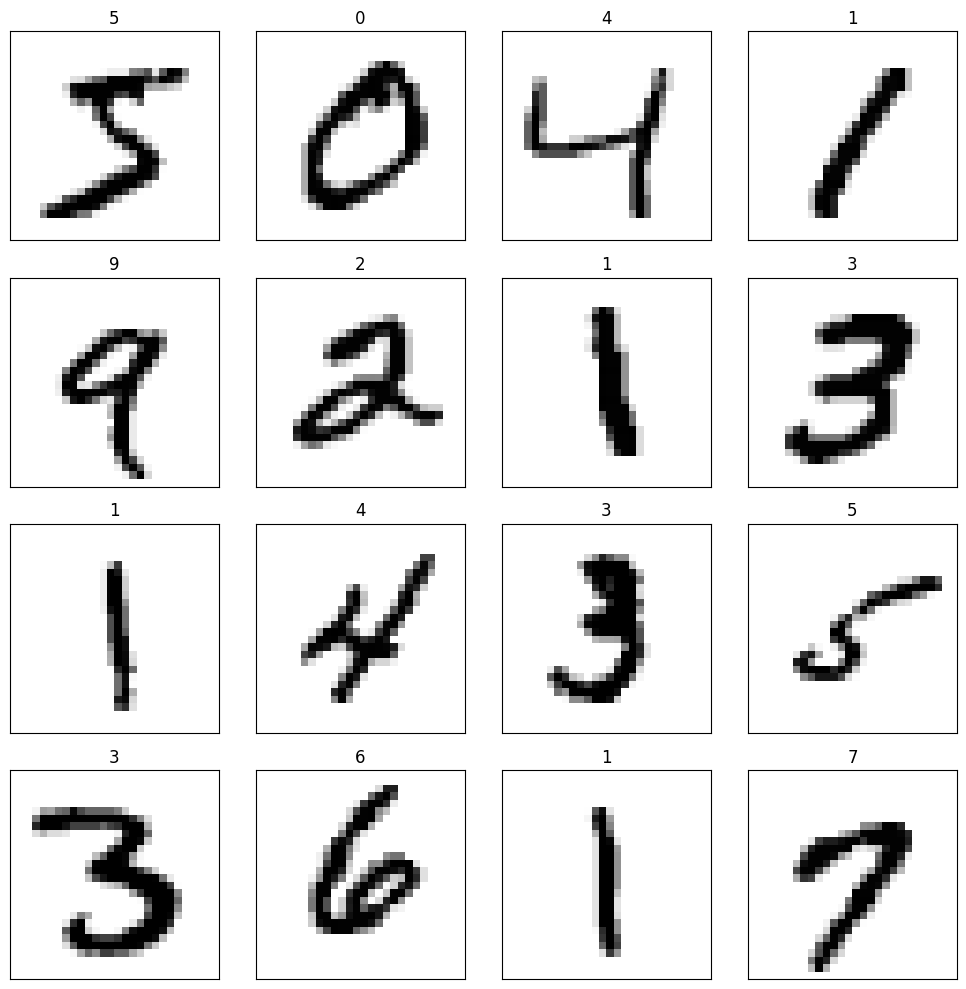

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
class_names = [str(i) for i in range(10)]
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1,28,28, 1)
x_test  = x_test.reshape(-1, 28,28,1)
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:

num_filters = 8
filter_size = 3
pool_size = 2
model = Sequential([
    Conv2D(num_filters, filter_size, padding="same", activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=pool_size, padding="same"),
    Conv2D(num_filters*2, filter_size, padding="same", activation="relu"),MaxPooling2D(pool_size=pool_size, padding="same"),Flatten(),Dense(64, activation="relu"),  Dense(10, activation="softmax")
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.8530 - loss: 0.5330 - val_accuracy: 0.9753 - val_loss: 0.0878
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9752 - loss: 0.0799 - val_accuracy: 0.9807 - val_loss: 0.0671
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9823 - loss: 0.0592 - val_accuracy: 0.9845 - val_loss: 0.0544
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9852 - loss: 0.0473 - val_accuracy: 0.9860 - val_loss: 0.0529
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9881 - loss: 0.0379 - val_accuracy: 0.9863 - val_loss: 0.0467


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9822 - loss: 0.0507
Test accuracy: 0.9857


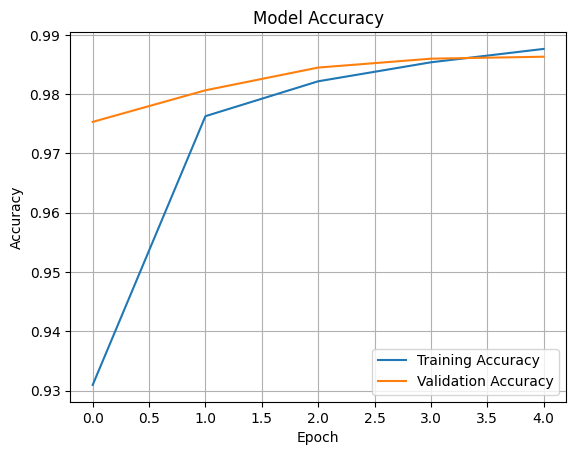

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predicted_classes = np.argmax(model.predict(x_test[:3]), axis=1)
print("True labels:", y_test[:3])
print("Predicted labels:", predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
True labels: [7 2 1]
Predicted labels: [7 2 1]


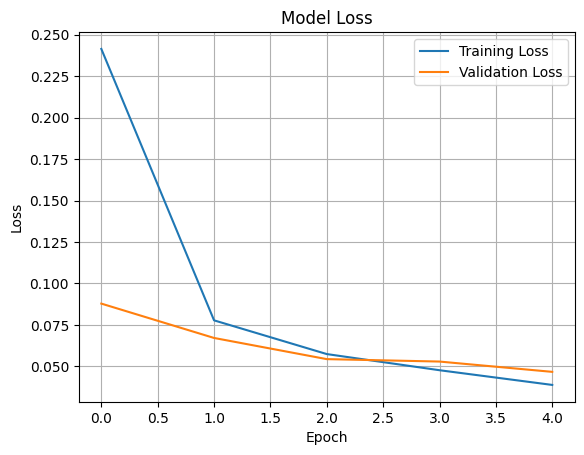

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()